In [38]:
#EDA를 위해 필요한 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp

In [2]:
# 엑셀 파일 불러오기
filename = 'WadizTotal2_FSadded.xlsx'
data = pd.read_excel(filename)

In [3]:
# 데이터 쭉 보고 싶으면 호출
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [4]:
print(data.shape)
print(data.info())
data.describe()
#펀딩시작요일- 라벨인코더필요해보임
#분기도 쓰려면 라벨인코더해야할듯

(6512, 51)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 51 columns):
Unnamed: 0      6512 non-null int64
Unnamed: 0.1    6512 non-null int64
url             6512 non-null object
제목              6512 non-null object
메이커             6512 non-null object
펀딩시작날짜          6512 non-null datetime64[ns]
펀딩마감날짜          6512 non-null datetime64[ns]
펀딩시작요일          6512 non-null object
목표금액            6512 non-null int64
달성액             6512 non-null int64
달성률             6512 non-null int64
서포터수            6512 non-null int64
좋아요수            6512 non-null int64
요약글             6512 non-null object
글업데이트수          6512 non-null int64
댓글수             6512 non-null int64
리워드종류수          6512 non-null float64
이미지수            6512 non-null float64
비디오수            6512 non-null float64
배송시작날짜          6512 non-null datetime64[ns]
마감배송차이          6512 non-null int64
인스타존재여부         6512 non-null int64
인스타팔로워수         6512 non-null int64
와디즈팔로워수         

Unnamed: 0  Unnamed: 0.1          목표금액           달성액           달성률  \
count  6512.000000   6512.000000  6.512000e+03  6.512000e+03   6512.000000   
mean   3255.500000   3255.500000  2.119400e+06  1.248702e+07    900.688575   
std    1879.996809   1879.996809  4.681482e+06  4.275089e+07   2146.181001   
min       0.000000      0.000000  3.000000e+05  0.000000e+00      0.000000   
25%    1627.750000   1627.750000  1.000000e+06  1.191650e+06    106.000000   
50%    3255.500000   3255.500000  1.000000e+06  3.383050e+06    272.000000   
75%    4883.250000   4883.250000  2.000000e+06  9.746000e+06    836.500000   
max    6511.000000   6511.000000  1.188000e+08  2.023334e+09  47963.000000   

              서포터수         좋아요수       글업데이트수          댓글수       리워드종류수  \
count  6512.000000  6512.000000  6512.000000  6512.000000  6512.000000   
mean    197.641892   119.391892     4.646192    33.668458     6.387473   
std     477.589500   218.690516     5.243346    90.484658     4.181797   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%      26.000000    26.000000     1.000000     4.000000     4.000000   
50%      66.000000    56.000000     3.000000    13.000000     6.000000   
75%     177.000000   122.000000     7.000000    33.000000     8.000000   
max    9800.000000  5312.000000    67.000000  2626.000000    88.000000   

              이미지수         비디오수       마감배송차이      인스타존재여부       인스타팔로워수  \
count  6512.000000  6512.000000  6512.000000  6512.000000   6512.000000   
mean     34.793855     0.604650    50.411701     0.734797   1705.290080   
std      20.860146     1.252073    33.434751     0.441475   5611.442733   
min       0.000000     0.000000  -347.000000     0.000000      0.000000   
25%      20.000000     0.000000    37.000000     0.000000      0.000000   
50%      31.000000     0.000000    46.000000     1.000000    128.000000   
75%      45.000000     1.000000    66.000000     1.000000   1138.000000   
max     279.000000    18.000000   411.000000     1.000000  92600.000000   

           와디즈팔로워수      과거프로젝트수    과거성공프로젝트수       앵콜펀딩여부        디자인소품  \
count  6512.000000  6512.000000  6512.000000  6512.000000  6512.000000   
mean      7.831695     1.900693     2.394096     0.089527     0.082770   
std      19.311977     3.351187     3.221923     0.285525     0.275556   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     1.000000     0.000000     0.000000   
50%       1.000000     1.000000     1.000000     0.000000     0.000000   
75%       6.000000     2.000000     3.000000     0.000000     0.000000   
max     264.000000    26.000000    26.000000     1.000000     1.000000   

              반려동물           뷰티     스포츠·모빌리티        여행·레저        테크·가전  \
count  6512.000000  6512.000000  6512.000000  6512.000000  6512.000000   
mean      0.073710     0.109490     0.023188     0.035473     0.088452   
std       0.261319     0.312277     0.150512     0.184986     0.283973   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             패션·잡화           푸드          홈리빙           음절수          단어수  \
count  6512.000000  6512.000000  6512.000000   6512.000000  6512.000000   
mean      0.325706     0.134674     0.126536   2984.650184  1653.299140   
std       0.468674     0.341402     0.332478   1639.216531   908.978038   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       0.000000     0.000000     0.000000   1972.000000  1092.000000   
50%       0.000000     0.000000     0.000000   2801.000000  1548.000000   
75%       1.000000     0.000000     0.000000   3807.250000  2104.250000   
max       1.000000     1.000

In [5]:
data.head(2)

Unnamed: 0  Unnamed: 0.1                                             url  \
0           0             0  https://www.wadiz.kr/web/campaign/detail/40364   
1           1             1  https://www.wadiz.kr/web/campaign/detail/42242   

                                      제목             메이커     펀딩시작날짜  \
0           직접기른 비트와 당근으로 만들어 먹기편한 레드비트즙          오케이네이쳐 2019-08-01   
1  [ 딱! 7일간 진행 ! ] 딱딱함 뒤에 달콤한 매력의 오도로끼 !  올마망(all maman) 2019-08-05   

      펀딩마감날짜 펀딩시작요일     목표금액      달성액  달성률  서포터수  좋아요수  \
0 2019-08-11    Thu   500000   803000  160    33    16   
1 2019-08-11    Mon  1000000  5862300  586   170    45   

                                                 요약글  글업데이트수  댓글수  리워드종류수  \
0  공기좋은 영암에서 정성껏 키워 수확 후 저장하지 않고 바로 만든 비트즙입니다 당근이...       0    2     4.0   
1  오도로끼는 7월 말~8월 중순 최상의 맛을 볼수 있는 과일입니다. 서포터님들에게 최...       3    9     5.0   

   이미지수  비디오수     배송시작날짜  마감배송차이  인스타존재여부  인스타팔로워수  와디즈팔로워수  과거프로젝트수  \
0  15.0   0.0 2019-09-19      39        1        0        0      0.0   
1  25.0   0.0 2019-09-19      39        1       18        7      0.0   

   과거성공프로젝트수  앵콜펀딩여부 카테고리  디자인소품  반려동물  뷰티  스포츠·모빌리티  여행·레저  테크·가전  패션·잡화  푸드  \
0        1.0       0   푸드      0     0   0         0      0      0      0   1   
1        1.0       0   푸드      0     0   0         0      0      0      0   1   

   홈리빙   음절수   단어수  문장수  Strong  Under        가독성       가독성2  제목단어수  펀딩성공여부  \
0    0  1269   707   41      12      1  37.483217  12.315037      6       1   
1    0  3339  1800   84      99     36  28.152000  14.656143      8       1   

       분기     PER증감     PBR증감     ROE증감      EBIT증감  
0  19Q1적용  6.834688  0.084375 -0.600938  317.081549  
1  19Q1적용  6.834688  0.084375 -0.600938  317.081549

In [6]:
data.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace = True)
data.head(1)

url  \
0  https://www.wadiz.kr/web/campaign/detail/40364   

                             제목     메이커     펀딩시작날짜     펀딩마감날짜 펀딩시작요일    목표금액  \
0  직접기른 비트와 당근으로 만들어 먹기편한 레드비트즙  오케이네이쳐 2019-08-01 2019-08-11    Thu  500000   

      달성액  달성률  서포터수  좋아요수                                                요약글  \
0  803000  160    33    16  공기좋은 영암에서 정성껏 키워 수확 후 저장하지 않고 바로 만든 비트즙입니다 당근이...   

   글업데이트수  댓글수  리워드종류수  이미지수  비디오수     배송시작날짜  마감배송차이  인스타존재여부  인스타팔로워수  \
0       0    2     4.0  15.0   0.0 2019-09-19      39        1        0   

   와디즈팔로워수  과거프로젝트수  과거성공프로젝트수  앵콜펀딩여부 카테고리  디자인소품  반려동물  뷰티  스포츠·모빌리티  여행·레저  \
0        0      0.0        1.0       0   푸드      0     0   0         0      0   

   테크·가전  패션·잡화  푸드  홈리빙   음절수  단어수  문장수  Strong  Under        가독성       가독성2  \
0      0      0   1    0  1269  707   41      12      1  37.483217  12.315037   

   제목단어수  펀딩성공여부      분기     PER증감     PBR증감     ROE증감      EBIT증감  
0      6       1  19Q1적용  6.834688  0.084375 -0.600938  317.081549

In [7]:
# 전체적인 흐름
pp.ProfileReport(data)

In [8]:
# 각 특성(컬럼)들 간의 상관 관계 조사
corr= data.corr()
corr

목표금액       달성액       달성률      서포터수      좋아요수    글업데이트수  \
목표금액       1.000000  0.091201 -0.065818  0.027899  0.045691  0.018180   
달성액        0.091201  1.000000  0.661959  0.702977  0.782592  0.390943   
달성률       -0.065818  0.661959  1.000000  0.682809  0.701251  0.385340   
서포터수       0.027899  0.702977  0.682809  1.000000  0.851223  0.408151   
좋아요수       0.045691  0.782592  0.701251  0.851223  1.000000  0.462834   
글업데이트수     0.018180  0.390943  0.385340  0.408151  0.462834  1.000000   
댓글수        0.059189  0.705419  0.556268  0.839041  0.773320  0.451751   
리워드종류수    -0.050453  0.072400  0.116789  0.080353  0.089394  0.163082   
이미지수      -0.019742  0.154783  0.209619  0.166308  0.208612  0.247529   
비디오수       0.060021  0.117740  0.074655  0.109157  0.139546  0.155728   
마감배송차이     0.115892  0.092815  0.051208  0.057057  0.090787  0.057759   
인스타존재여부   -0.037547  0.004270  0.037331  0.014612  0.011215  0.054670   
인스타팔로워수    0.010015  0.023525  0.049871  0.029101  0.033247 -0.001272   
와디즈팔로워수   -0.003889  0.364600  0.323200  0.326847  0.364759  0.283081   
과거프로젝트수   -0.063386  0.031327  0.071748  0.052912  0.056738  0.114215   
과거성공프로젝트수 -0.085243  0.064545  0.118640  0.095989  0.104741  0.185651   
앵콜펀딩여부    -0.059020  0.065011  0.114774  0.072257  0.071202  0.113286   
디자인소품     -0.006227 -0.046143 -0.064451 -0.044833 -0.048221 -0.031496   
반려동물      -0.005139  0.015303  0.007499  0.001125 -0.007982  0.011078   
뷰티        -0.039649 -0.029880  0.036003  0.001213 -0.027285 -0.002977   
스포츠·모빌리티   0.147325  0.024604 -0.002600  0.022319 -0.001513  0.000472   
여행·레저      0.034542  0.010832 -0.001663 -0.010767  0.011201  0.012783   
테크·가전      0.145746  0.170520  0.080808  0.168018  0.229786  0.138096   
패션·잡화     -0.064630 -0.073623 -0.069470 -0.116056 -0.090916 -0.126784   
푸드        -0.053632 -0.019325  0.009778  0.003736 -0.058417 -0.001348   
홈리빙       -0.017778  0.015098  0.034678  0.047275  0.058201  0.075021   
음절수        0.014920  0.163727  0.182431  0.148370  0.182632  0.280203   
단어수        0.015570  0.162609  0.180801  0.145156  0.179633  0.280287   
문장수        0.006660  0.158186  0.178963  0.138392  0.176059  0.267807   
Strong    -0.003721  0.131796  0.160027  0.116104  0.147545  0.254971   
Under      0.020882  0.098734  0.106351  0.084618  0.102545  0.188477   
가독성        0.005049 -0.017178 -0.027337 -0.037655 -0.033586 -0.022949   
가독성2       0.010798  0.013091  0.018997  0.026630  0.020064  0.018507   
제목단어수     -0.057397  0.051113  0.104527  0.064833  0.066069  0.103210   
펀딩성공여부    -0.193389  0.140670  0.209957  0.192794  0.222936  0.397539   
PER증감      0.028829  0.019807  0.005627  0.023943  0.035334  0.105365   
PBR증감     -0.015428 -0.023979 -0.030859 -0.027053 -0.034875 -0.080936   
ROE증감     -0.000792 -0.036333 -0.026261 -0.026342 -0.039316 -0.042342   
EBIT증감     0.006532  0.023283  0.027275  0.049879  0.036079  0.031876   

                댓글수    리워드종류수      이미지수      비디오수    마감배송차이   인스타존재여부  \
목표금액       0.059189 -0.050453 -0.019742  0.060021  0.115892 -0.037547   
달성액        0.705419  0.072400  0.154783  0.117740  0.092815  0.004270   
달성률        0.556268  0.116789  0.209619  0.074655  0.051208  0.037331   
서포터수       0.839041  0.080353  0.166308  0.109157  0.057057  0.014612   
좋아요수       0.773320  0.089394  0.208612  0.139546  0.090787  0.011215   
글업데이트수     0.451751  0.163082  0.247529  0.155728  0.057759  0.054670   
댓글수        1.000000  0.067859  0.139525  0.133036  0.085621  0.004465   
리워드종류수     0.067859  1.000000  0.354140  0.077193 -0.011972  0.091154   
이미지수       0.139525  0.354140  1.000000  0.140354  0.088995  0.149342   
비디오수       0.133036  0.077193  0.140354  1.000000  0.056248 -0.014690   
마감배송차이     0.085621 -0.011972  0.088995  0.056248  1.000000  0.029134   
인스타존재여부    0.004465  0.091154  0.149342 -0.014690  0.029134  1.000000   
인스타팔로워수    0.021984  0.017988  0.112746  0.028024  0.022037  0.182584   
와디즈팔로워수    0.320571  0.080668  0.163787  0.038734  0.013931 -0.000174   

In [9]:
corr.펀딩성공여부.sort_values(ascending= False)

펀딩성공여부       1.000000
글업데이트수       0.397539
과거성공프로젝트수    0.268247
좋아요수         0.222936
달성률          0.209957
이미지수         0.200768
서포터수         0.192794
음절수          0.171057
단어수          0.169110
문장수          0.168381
댓글수          0.167863
와디즈팔로워수      0.165884
Strong       0.159659
리워드종류수       0.158944
달성액          0.140670
앵콜펀딩여부       0.129703
Under        0.121270
제목단어수        0.119220
과거프로젝트수      0.116394
비디오수         0.088666
인스타존재여부      0.085140
푸드           0.061477
뷰티           0.057879
홈리빙          0.054954
EBIT증감       0.049222
테크·가전        0.046402
인스타팔로워수      0.046022
PER증감        0.032608
가독성2        -0.003367
스포츠·모빌리티    -0.007492
반려동물        -0.013345
가독성         -0.016443
ROE증감       -0.020263
여행·레저       -0.022442
PBR증감       -0.034085
마감배송차이      -0.034706
패션·잡화       -0.082207
디자인소품       -0.084250
목표금액        -0.193389
Name: 펀딩성공여부, dtype: float64

In [10]:
corr.달성률.sort_values(ascending= False)

달성률          1.000000
좋아요수         0.701251
서포터수         0.682809
달성액          0.661959
댓글수          0.556268
글업데이트수       0.385340
와디즈팔로워수      0.323200
펀딩성공여부       0.209957
이미지수         0.209619
음절수          0.182431
단어수          0.180801
문장수          0.178963
Strong       0.160027
과거성공프로젝트수    0.118640
리워드종류수       0.116789
앵콜펀딩여부       0.114774
Under        0.106351
제목단어수        0.104527
테크·가전        0.080808
비디오수         0.074655
과거프로젝트수      0.071748
마감배송차이       0.051208
인스타팔로워수      0.049871
인스타존재여부      0.037331
뷰티           0.036003
홈리빙          0.034678
EBIT증감       0.027275
가독성2         0.018997
푸드           0.009778
반려동물         0.007499
PER증감        0.005627
여행·레저       -0.001663
스포츠·모빌리티    -0.002600
ROE증감       -0.026261
가독성         -0.027337
PBR증감       -0.030859
디자인소품       -0.064451
목표금액        -0.065818
패션·잡화       -0.069470
Name: 달성률, dtype: float64

In [11]:
# 다 1이라고해도 약79%의 정확도
# classification이면 실패작 판결이 중요
# 달성률로 바꿔야 할 수도..????

# classification 학습을 위한 준비
# 펀딩시작요일- 라벨인코더
# 컬럼삭제 url ,제목, 메이커,펀딩시작날짜,펀딩마감날짜,목표금액,달성액,달성률,요약글,배송시작날짜,과거프로젝트수, 카테고리,분기
# 데이터셋 나누기
# 데이터셋에 가중치주기?

In [12]:
# 펀딩시작요일- LabelEncoder으로 숫자 타입으로 변환
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data.펀딩시작요일= le.fit_transform(data.펀딩시작요일)
le.classes_
#0:Fri
#1:Mon
#2:Sat
#3:Sun
#4:Thu
#5:Tue
#6:Wed

array(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype=object)

In [13]:
data.head(1)

url  \
0  https://www.wadiz.kr/web/campaign/detail/40364   

                             제목     메이커     펀딩시작날짜     펀딩마감날짜  펀딩시작요일    목표금액  \
0  직접기른 비트와 당근으로 만들어 먹기편한 레드비트즙  오케이네이쳐 2019-08-01 2019-08-11       4  500000   

      달성액  달성률  서포터수  좋아요수                                                요약글  \
0  803000  160    33    16  공기좋은 영암에서 정성껏 키워 수확 후 저장하지 않고 바로 만든 비트즙입니다 당근이...   

   글업데이트수  댓글수  리워드종류수  이미지수  비디오수     배송시작날짜  마감배송차이  인스타존재여부  인스타팔로워수  \
0       0    2     4.0  15.0   0.0 2019-09-19      39        1        0   

   와디즈팔로워수  과거프로젝트수  과거성공프로젝트수  앵콜펀딩여부 카테고리  디자인소품  반려동물  뷰티  스포츠·모빌리티  여행·레저  \
0        0      0.0        1.0       0   푸드      0     0   0         0      0   

   테크·가전  패션·잡화  푸드  홈리빙   음절수  단어수  문장수  Strong  Under        가독성       가독성2  \
0      0      0   1    0  1269  707   41      12      1  37.483217  12.315037   

   제목단어수  펀딩성공여부      분기     PER증감     PBR증감     ROE증감      EBIT증감  
0      6       1  19Q1적용  6.834688  0.084375 -0.600938  317.081549

In [14]:
# 컬럼삭제 url ,제목, 메이커,펀딩시작날짜,펀딩마감날짜,목표금액,달성액,달성률,요약글,배송시작날짜,과거프로젝트수, 카테고리
data.drop(columns=['url','제목','메이커','펀딩시작날짜','펀딩마감날짜','목표금액',
                   '달성액','달성률','요약글','배송시작날짜','과거프로젝트수','카테고리','분기'], inplace = True)
data.head(1)

펀딩시작요일  서포터수  좋아요수  글업데이트수  댓글수  리워드종류수  이미지수  비디오수  마감배송차이  인스타존재여부  \
0       4    33    16       0    2     4.0  15.0   0.0      39        1   

   인스타팔로워수  와디즈팔로워수  과거성공프로젝트수  앵콜펀딩여부  디자인소품  반려동물  뷰티  스포츠·모빌리티  여행·레저  \
0        0        0        1.0       0      0     0   0         0      0   

   테크·가전  패션·잡화  푸드  홈리빙   음절수  단어수  문장수  Strong  Under        가독성       가독성2  \
0      0      0   1    0  1269  707   41      12      1  37.483217  12.315037   

   제목단어수  펀딩성공여부     PER증감     PBR증감     ROE증감      EBIT증감  
0      6       1  6.834688  0.084375 -0.600938  317.081549

In [15]:
target= data.펀딩성공여부
target.head()

0    1
1    1
2    1
3    1
4    1
Name: 펀딩성공여부, dtype: int64

In [16]:
wadizdata=data.drop(columns=['펀딩성공여부','PER증감','PBR증감','ROE증감','EBIT증감','가독성','가독성2','음절수','단어수',
                             '좋아요수','서포터수','댓글수'])
wadizdata.head(1)

펀딩시작요일  글업데이트수  리워드종류수  이미지수  비디오수  마감배송차이  인스타존재여부  인스타팔로워수  와디즈팔로워수  \
0       4       0     4.0  15.0   0.0      39        1        0        0   

   과거성공프로젝트수  앵콜펀딩여부  디자인소품  반려동물  뷰티  스포츠·모빌리티  여행·레저  테크·가전  패션·잡화  푸드  홈리빙  \
0        1.0       0      0     0   0         0      0      0      0   1    0   

   문장수  Strong  Under  제목단어수  
0   41      12      1      6

In [17]:
# 학습용/테스트용 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wadizdata,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=100)

In [18]:
# 랜덤포레스트
# 모델 선택 및 학습
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
# 1) 랜덤포레스트 분류 객체 생성
rf_clf = RandomForestClassifier()

# 2) 학습
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
#실제 예측한 결과값
rf_pred= rf_clf.predict(X_test)

In [21]:
feature=pd.DataFrame(wadizdata.columns)

In [22]:
importance=pd.DataFrame(rf_clf.feature_importances_)

In [23]:
중요도 =pd.concat([feature,importance],axis=1)

In [24]:
중요도

0         0
0      펀딩시작요일  0.019518
1      글업데이트수  0.226537
2      리워드종류수  0.035046
3        이미지수  0.046216
4        비디오수  0.009839
5      마감배송차이  0.045131
6     인스타존재여부  0.006859
7     인스타팔로워수  0.036179
8     와디즈팔로워수  0.041272
9   과거성공프로젝트수  0.313357
10     앵콜펀딩여부  0.005862
11      디자인소품  0.007064
12       반려동물  0.003486
13         뷰티  0.004435
14   스포츠·모빌리티  0.001558
15      여행·레저  0.002509
16      테크·가전  0.002930
17      패션·잡화  0.012498
18         푸드  0.005018
19        홈리빙  0.029458
20        문장수  0.041783
21     Strong  0.044329
22      Under  0.033075
23      제목단어수  0.026041

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rf_pred)
#94%....??????뭔가 이상함 아무것도 안했는데

0.9293756397134084

In [26]:
import sklearn.metrics as mt
print('accuracy', mt.accuracy_score(y_test,rf_pred) )

print('precision', mt.precision_score(y_test,rf_pred) )

print('recall', mt.recall_score(y_test,rf_pred) )

print('f1', mt.f1_score(y_test,rf_pred) )



print(mt.classification_report(y_test,rf_pred))

print(mt.confusion_matrix(y_test,rf_pred))
#.......??!!?!

accuracy 0.9293756397134084
precision 0.949520766773163
recall 0.9618122977346278
f1 0.9556270096463022
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       409
           1       0.95      0.96      0.96      1545

    accuracy                           0.93      1954
   macro avg       0.90      0.88      0.89      1954
weighted avg       0.93      0.93      0.93      1954

[[ 330   79]
 [  59 1486]]


In [27]:
#교차검증
from sklearn.model_selection import cross_val_score, cross_validate
cross_val_score(rf_clf, wadizdata,target, cv=5)
#뭐지....???

array([0.8971604 , 0.83192632, 0.91397849, 0.80184332, 0.92780338])

In [28]:
pd.DataFrame(cross_validate(rf_clf, wadizdata, target, cv=5, return_train_score=True))
#....?!?!??!

fit_time  score_time  test_score  train_score
0  0.053412    0.003458    0.919417     0.996736
1  0.041431    0.002869    0.709133     0.995777
2  0.038424    0.002743    0.918587     0.997697
3  0.038460    0.002796    0.754224     0.995393
4  0.037705    0.002853    0.940860     0.997505

In [29]:
# 학습용 데이터로 교차검증을 수행
cross_validate(rf_clf, X_train, y_train, cv=20, return_train_score=True)
# ....?!

{'fit_time': array([0.04604983, 0.04394889, 0.03320408, 0.03281021, 0.0333643 ,
        0.033602  , 0.03256392, 0.03478026, 0.03298187, 0.03678489,
        0.03349113, 0.03602791, 0.03679013, 0.04801202, 0.04474401,
        0.04152298, 0.04222894, 0.03860998, 0.03483009, 0.03622484]),
 'score_time': array([0.00230813, 0.00205112, 0.00181103, 0.00173879, 0.00174904,
        0.00175881, 0.00171232, 0.0018158 , 0.00180793, 0.001858  ,
        0.00246191, 0.00194407, 0.00306892, 0.00329518, 0.00282216,
        0.00294685, 0.00253987, 0.00216699, 0.00180411, 0.00201011]),
 'test_score': array([0.91703057, 0.89956332, 0.90829694, 0.93449782, 0.930131  ,
        0.92139738, 0.94323144, 0.93859649, 0.93421053, 0.91666667,
        0.9254386 , 0.92511013, 0.88986784, 0.88986784, 0.92070485,
        0.94273128, 0.93832599, 0.92070485, 0.94273128, 0.93832599]),
 'train_score': array([0.995149  , 0.996997  , 0.996766  , 0.996535  , 0.996304  ,
        0.996535  , 0.996535  , 0.99584296, 0.9965358 ,

In [30]:
#평가
rf_clf.score(X_test,y_test)
# 아니 뭐지....?????이렇게 높게 나올리가 없는데....??????

0.9293756397134084

In [31]:
#학습데이터를 이상하게 넣었나...???정신없이 그냥 한거라 뭔가 착오가 있는듯

In [32]:
# 디시젼트리
from sklearn.tree import DecisionTreeClassifier
# 1) 디시젼트리 분류 객체 생성
dt_clf = DecisionTreeClassifier()

# 2) 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
#실제 예측한 결과값
dt_pred= dt_clf.predict(X_test)

accuracy_score(y_test,dt_pred)

0.8899692937563971

In [34]:
print('accuracy', mt.accuracy_score(y_test,dt_pred) )

print('precision', mt.precision_score(y_test,dt_pred) )

print('recall', mt.recall_score(y_test,dt_pred) )

print('f1', mt.f1_score(y_test,dt_pred) )



print(mt.classification_report(y_test,dt_pred))

print(mt.confusion_matrix(y_test,dt_pred))

accuracy 0.8899692937563971
precision 0.934640522875817
recall 0.9255663430420712
f1 0.9300813008130081
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       409
           1       0.93      0.93      0.93      1545

    accuracy                           0.89      1954
   macro avg       0.83      0.84      0.84      1954
weighted avg       0.89      0.89      0.89      1954

[[ 309  100]
 [ 115 1430]]


In [35]:
import graphviz

In [36]:
f_importances = dt_clf.feature_importances_
dt_f_importances = pd.DataFrame({'feature': wadizdata.columns, 
           'importance':f_importances})
dt_f_importances

feature  importance
0      펀딩시작요일    0.015153
1      글업데이트수    0.133054
2      리워드종류수    0.031959
3        이미지수    0.026864
4        비디오수    0.007497
5      마감배송차이    0.035925
6     인스타존재여부    0.003252
7     인스타팔로워수    0.026655
8     와디즈팔로워수    0.026478
9   과거성공프로젝트수    0.456868
10     앵콜펀딩여부    0.003708
11      디자인소품    0.008146
12       반려동물    0.005374
13         뷰티    0.000000
14   스포츠·모빌리티    0.001852
15      여행·레저    0.001738
16      테크·가전    0.004559
17      패션·잡화    0.004151
18         푸드    0.003538
19        홈리빙    0.110527
20        문장수    0.030025
21     Strong    0.019492
22      Under    0.027332
23      제목단어수    0.015851

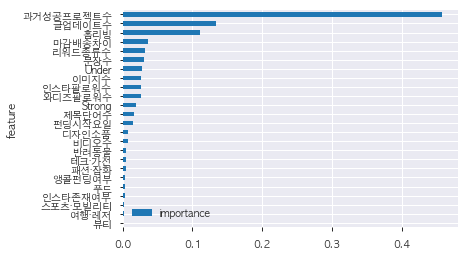

In [39]:
dt_f_importances.set_index('feature')\
    .sort_values(by= 'importance').plot(kind = 'barh')

In [40]:
# Tree 시각화
# 단순한 결정트리 모델 생성
simple_dt = DecisionTreeClassifier(max_depth = 3)
simple_dt.fit(X_train, y_train)
# Tree 시각화
from sklearn import tree
# 트리 시각화의 가독성을 높이기 위해서 피처명과 타겟명이 나오도록..
features = wadizdata.columns
targets = ['실패', '성공']

In [41]:
dot_data = tree.export_graphviz(simple_dt, out_file = None,
                               feature_names = features, 
                               class_names = targets, 
                               filled = True, 
                            rounded = True) 

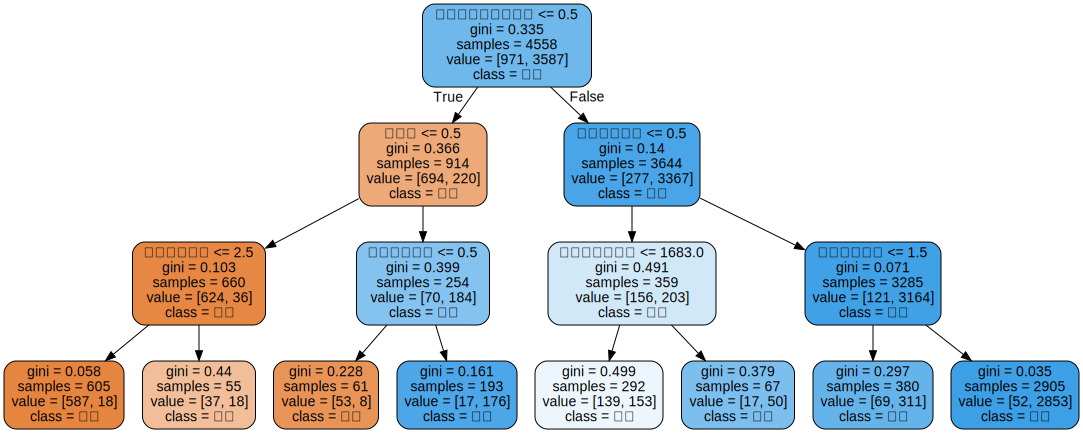

In [42]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
#랜덤서치 않에 넣을 점수측정(f1스코어? 만들기 달성률은 rmse로 만들면 될듯..?)

In [ ]:
#rmse
from sklearn.metrics import make_scorer

#예측값(predict)정답(actual)
def rmse(predict, actual):
    
    predict = np.array(predict)
    actual = np.array(actual)

    distance = predict - actual
    
    square_distance = distance ** 2
    
    mean_square_distance = square_distance.mean()
    
    score = np.sqrt(mean_square_distance)
    
    return score

rmse_score = make_scorer(rmse)
rmse_score

### 혹시 몰라서 일단 하이퍼 파라미터 튜닝 코딩 만들어 놓기
### 파라미터 공부하면서 추가할것
Coarse & Finer Search

1) Coarse Search- Random Search  모든 하이퍼패러미터 범위(이론상으로 존재 가능한)
2) Finer Search- 좋지 않은 하이퍼패러미터를 버린 뒤 다시 한 번 Random Search

In [ ]:
# 아직 만드는중 - 달성률을 예측하려고 할때 쓸수도 있움!
# Coarse
# n_estimators= 트리갯수
# 보통은 높을수록 좋지만, 그만큼 실행 속도가 오래 걸리기 때문에 적당한 값을 설정 (5 개)
# 나머지 하이퍼패리미터가 전부 튜닝되면, 그 다음에는 n_estimators를 최대한 높이 주면 되기때문
n_estimators = 5

# 랜덤 서치를 반복할 횟수(보통 100으로 알고있으나 일단 5)
num_epoch = 5

#criterion= ['gini', 'entropy'] 보통 지니쓰면 될꺼 같아서 안함

# hyperparameter 탐색 결과를 리스트로 저장
coarse_hyperparameters_list = []

# num_epoch 횟수만큼 랜덤 서치를 반복
for epoch in range(num_epoch):
    # 2에서 100 사이의 정수 값을 랜덤하게 생성해서 max_depth 변수에 할당
    max_depth = np.random.randint(low=2, high=100)

    # 0.1에서 1.0 사이의 실수 값을 랜덤하게 생성하여  max_features 변수에 할당
    max_features = np.random.uniform(low=0.1, high=1.0)

    # Random Forest를 생성
    # 1) n_estimators. 트리의 갯수
    # 2) max_depth. 트리의 깊이
    # 3) max_features. Feature Sampling 0.0 ~ 1.0 사이의 값 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용
    
    model = RandomForestClassifier(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  n_jobs=-1,
                                  random_state=100)

    # cross_val_score를 실행
    # 정확도 평균스코어를 스코어로 할당
    score = cross_val_score(model, X_train, y_train, cv=20, scoring=mt.f1_score(y_test,rf_pred)).mean()
    
    # hyperparameter 탐색 결과 딕셔너리화 
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    # hyperparameter 탐색 결과 리스트에 저장
    coarse_hyperparameters_list.append(hyperparameters)

    # hyperparameter 탐색 결과 출력
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# coarse_hyperparameters_list를 PDataFrame으로 변환
coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

# score가 높은 순으로 정렬
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

print(coarse_hyperparameters_list.shape)

# coarse_hyperparameters_list의 상위 10개를 출력
coarse_hyperparameters_list.head(10)

In [ ]:
#Finer
n_estimators = 5

num_epoch = 5


finer_hyperparameters_list = []


for epoch in range(num_epoch):
    
    max_depth = np.random.randint(low=?, high=?) # coarse 에서 참고

    
    max_features = np.random.uniform(low=?, high=?) # coarse 에서 참고 

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  n_jobs=-1,
                                  random_state=37)

    score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean()
    
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    
    finer_hyperparameters_list.append(hyperparameters)

   
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")


finer_hyperparameters_list = pd.DataFrame.from_dict(finer_hyperparameters_list)

finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by="score")


print(finer_hyperparameters_list.shape)

finer_hyperparameters_list.head(10)

In [ ]:
# 가장 좋은 정확도가 나온하이퍼패러미터를 가져오기
best_hyperparameters = finer_hyperparameters_list.iloc[?] #0

best_max_depth = best_hyperparameters["max_depth"]

best_max_features = best_hyperparameters["max_features"]

# best_max_depth와 best_max_features를 출력
print(f"max_depth(best) = {best_max_depth}, max_features(best) = {best_max_features:.6f}")